In [1]:
# 导入第三方模块
from sklearn import svm
import pandas as pd
from sklearn import model_selection
from sklearn import metrics

In [2]:
# 读取外部数据
letters = pd.read_csv(r'letterdata.csv')
# 数据前5行
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# 将数据拆分为训练集和测试集
predictors = letters.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(letters[predictors], letters.letter, 
                                                                 test_size = 0.25, random_state = 1234)

In [4]:
# 选择线性可分SVM模型
linear_svc = svm.LinearSVC()
# 模型在训练数据集上的拟合
linear_svc.fit(X_train,y_train)

D:\software_install\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
# 模型在测试集上的预测
pred_linear_svc = linear_svc.predict(X_test)
# 模型的预测准确率
metrics.accuracy_score(y_test, pred_linear_svc)

0.5802

In [6]:
# 选择非线性SVM模型
nolinear_svc = svm.SVC(kernel='rbf')
# 模型在训练数据集上的拟合
nolinear_svc.fit(X_train,y_train)

D:\software_install\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# 模型在测试集上的预测
pred_svc = nolinear_svc.predict(X_test)
# 模型的预测准确率
metrics.accuracy_score(y_test,pred_svc)

0.9734

In [8]:
# 读取外部数据
forestfires = pd.read_csv(r'forestfires.csv')
# 数据前5行
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
# 删除day变量
forestfires.drop('day',axis = 1, inplace = True)
# 将月份作数值化处理
forestfires.month = pd.factorize(forestfires.month)[0]
# 预览数据前5行
forestfires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


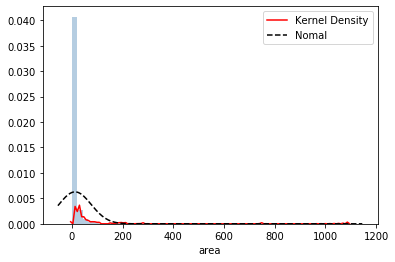

In [11]:
# 导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# 绘制森林烧毁面积的直方图
sns.distplot(forestfires.area, bins = 50, kde = True, fit = norm, hist_kws = {'color':'steelblue'}, 
             kde_kws = {'color':'red', 'label':'Kernel Density'}, 
             fit_kws = {'color':'black','label':'Nomal', 'linestyle':'--'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

In [12]:
# 导入第三方模块
from sklearn import preprocessing
import numpy as np
from sklearn import neighbors
# 对area变量作对数变换
y = np.log1p(forestfires.area)
# 将X变量作标准化处理
predictors = forestfires.columns[:-1]
X = preprocessing.scale(forestfires[predictors])

In [13]:
# 将数据拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [14]:
# 构建默认参数的SVM回归模型
svr = svm.SVR()
# 模型在训练数据集上的拟合
svr.fit(X_train,y_train)
# 模型在测试上的预测
pred_svr = svr.predict(X_test)
# 计算模型的MSE
metrics.mean_squared_error(y_test,pred_svr)

D:\software_install\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.925863595333521

In [15]:
# 使用网格搜索法，选择SVM回归中的最佳C值、epsilon值和gamma值
epsilon = np.arange(0.1,1.5,0.2)
C= np.arange(100,1000,200)
gamma = np.arange(0.001,0.01,0.002)
parameters = {'epsilon':epsilon,'C':C,'gamma':gamma}
grid_svr = model_selection.GridSearchCV(estimator = svm.SVR(max_iter=10000),param_grid =parameters,
                                        scoring='neg_mean_squared_error',cv=5,verbose =1, n_jobs=2)
# 模型在训练数据集上的拟合
grid_svr.fit(X_train,y_train)
# 返回交叉验证后的最佳参数值
print(grid_svr.best_params_, grid_svr.best_score_)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 348 tasks      | elapsed:    7.9s


{'C': 300, 'epsilon': 1.1000000000000003, 'gamma': 0.001} -1.9940579497706303


[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed:   21.1s finished
D:\software_install\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
# 模型在测试集上的预测
pred_grid_svr = grid_svr.predict(X_test)
# 计算模型在测试集上的MSE值
metrics.mean_squared_error(y_test,pred_grid_svr)

1.7455012238826595